In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("kaggle_diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

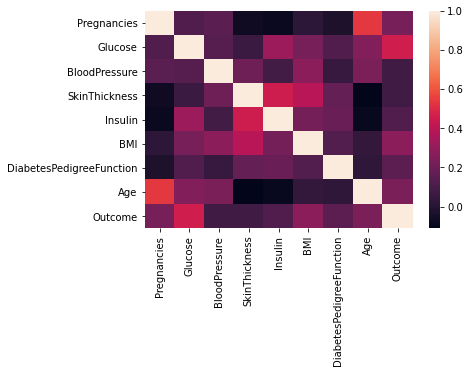

In [7]:

sns.heatmap(df.corr())

<AxesSubplot:xlabel='Age', ylabel='count'>

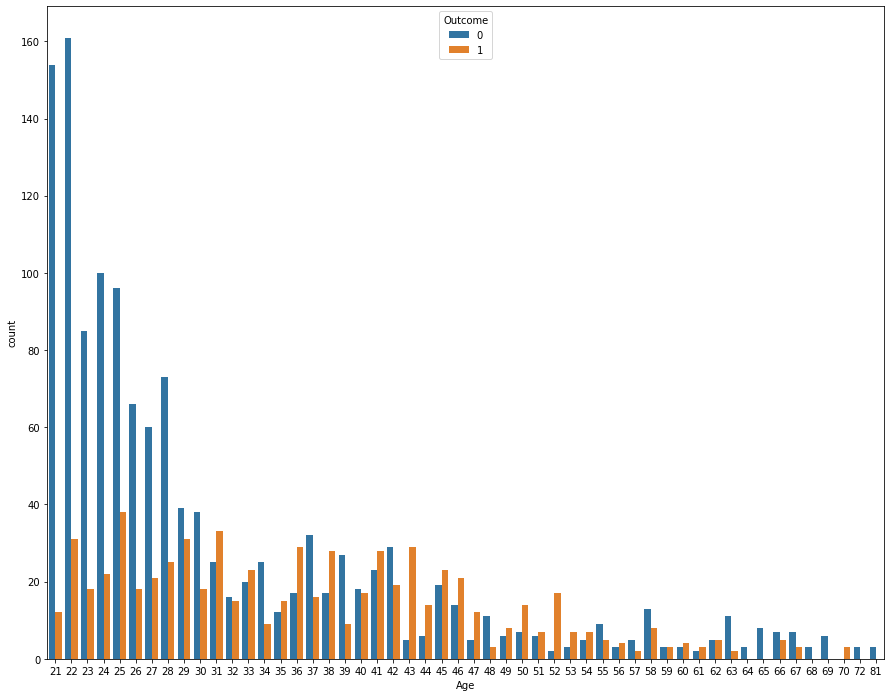

In [8]:
plt.figure(figsize=(15,12))
sns.countplot(x=df['Age'],hue="Outcome",data=df)

In [31]:
#Diabetes is less in older ages 

<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

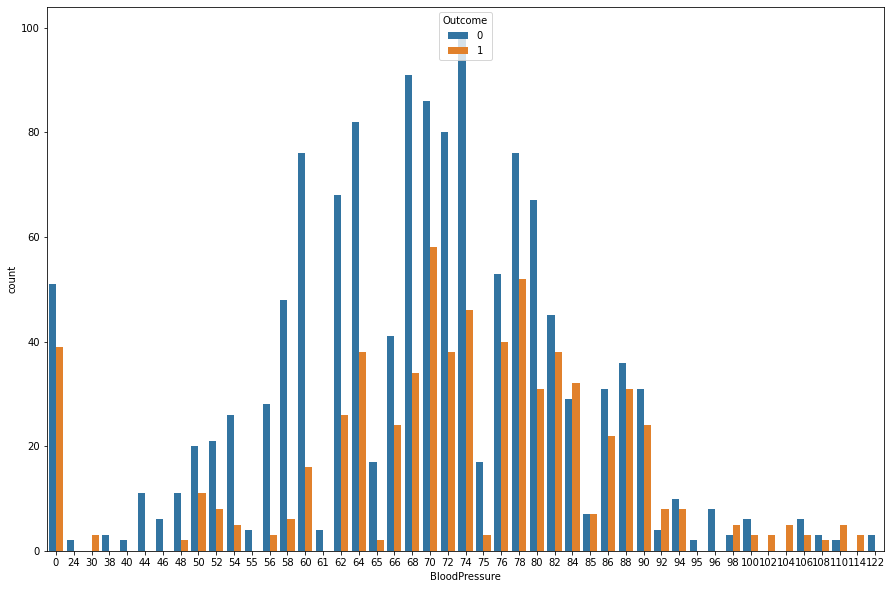

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['BloodPressure'],hue="Outcome",data=df)

In [34]:
#1st value is outlier diabetes is more in 60-90 BP

<AxesSubplot:xlabel='Insulin', ylabel='Age'>

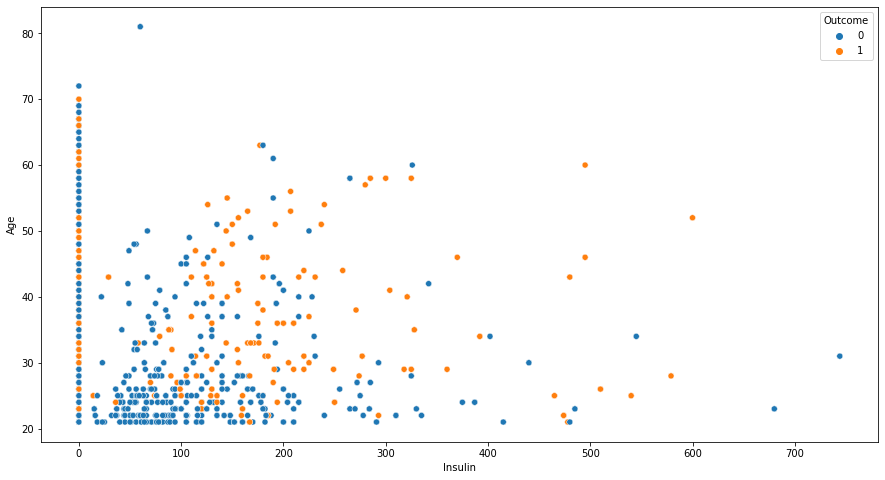

In [10]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Insulin'],y=df["Age"],hue="Outcome",data=df)

In [43]:
#for insulin 100-399 and the age is 22 is 60 it is more

<AxesSubplot:xlabel='SkinThickness', ylabel='Age'>

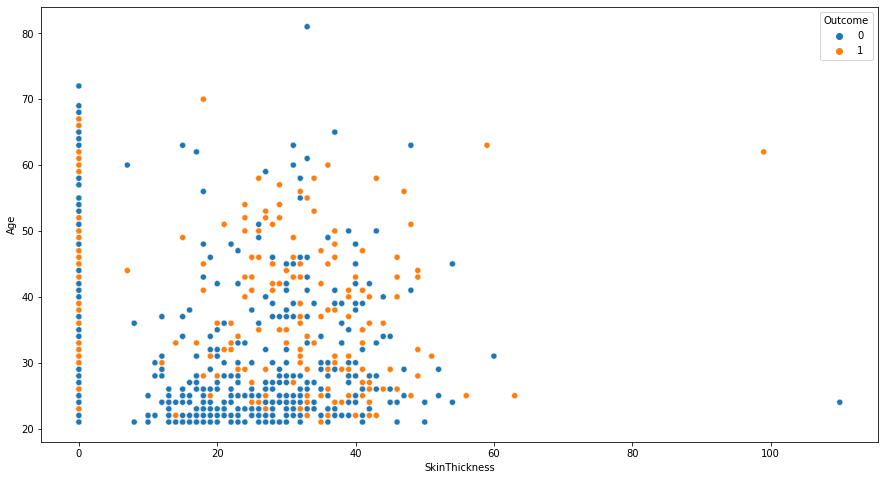

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['SkinThickness'],y=df["Age"],hue="Outcome",data=df)

In [48]:
#there are some outliers

In [12]:
#replacing nan values with 0's
df_copy=df.copy()

In [13]:
df_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
columns_should_replace=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [20]:

for i in columns_should_replace:
    df_copy[i]=df_copy[i].replace(0,np.NaN)

In [16]:
columns_with_na=[columns_should_replace[features].replace(0,np.NaN) for features in columns_should_replace]

In [17]:
columns_with_na

[0       138.0
 1        84.0
 2       145.0
 3       135.0
 4       139.0
         ...  
 1995     75.0
 1996    179.0
 1997     85.0
 1998    129.0
 1999     81.0
 Name: Glucose, Length: 2000, dtype: float64,
 0        62.0
 1        82.0
 2         NaN
 3        68.0
 4        62.0
         ...  
 1995     64.0
 1996     72.0
 1997     78.0
 1998    110.0
 1999     72.0
 Name: BloodPressure, Length: 2000, dtype: float64,
 0       35.0
 1       31.0
 2        NaN
 3       42.0
 4       41.0
         ... 
 1995    24.0
 1996    42.0
 1997     NaN
 1998    46.0
 1999    15.0
 Name: SkinThickness, Length: 2000, dtype: float64,
 0         NaN
 1       125.0
 2         NaN
 3       250.0
 4       480.0
         ...  
 1995     55.0
 1996    130.0
 1997      NaN
 1998    130.0
 1999     76.0
 Name: Insulin, Length: 2000, dtype: float64,
 0       33.6
 1       38.2
 2       44.2
 3       42.3
 4       40.7
         ... 
 1995    29.7
 1996    32.7
 1997    31.2
 1998    67.1
 1999    30.1
 

In [21]:
cols_with_na=[feature for feature in df_copy if df_copy[feature].isnull().sum()>1]

for feature in cols_with_na:
    print(feature,np.round(df_copy[feature].isnull().mean(),4),"percentage missing values")

Glucose 0.0065 percentage missing values
BloodPressure 0.045 percentage missing values
SkinThickness 0.2865 percentage missing values
Insulin 0.478 percentage missing values
BMI 0.014 percentage missing values


In [1]:
#these are the percentage of outliers


In [22]:
#we will replce the NaN values with mean and median
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [23]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
#model selection we use randomforest
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()


In [29]:
#split the data
from sklearn.model_selection import train_test_split
x=df_copy.drop(["Outcome"],axis=1)
y=df_copy[["Outcome"]]

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
classifier.fit(xtrain,ytrain)

<ipython-input-34-891105a6ee64>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(xtrain,ytrain)


RandomForestClassifier()

In [35]:
predict=classifier.predict(xtest)

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
print(accuracy_score(ytest,predict))

0.995


In [38]:
print(confusion_matrix(ytest,predict))

[[272   0]
 [  2 126]]


In [39]:
#The accuracy is good so we will dump into pickle file
import pickle

In [41]:
filename="diabetes_rfc_model.pkl"
pickle.dump(classifier,open(filename,"wb"))